# Analisis de pesos

Revisaremos una muestra poblacional de 200 datos de diferentes generos, edades y estaturas de las cuales sacaremos unas conclusiones de manera sencilla
 

In [478]:
import pandas as pd
import numpy as np
import matplotlib as plt



Ruta del archivo para generar el Dataframe

In [479]:
path = 'MOCK_DATA.csv'

Lectura del archivo mediante pandas y le damos un nombre df = Dataframe

In [480]:
df = pd.read_csv(path, sep=';')

Imprimimos el Dataframe para revisar que datos tenemos.

Aqui podemos ver con que datos contamos para empezar a generar los analisis

In [481]:
df

,Nombre,Apellido,email,Genero,Altura,Peso,Edad
0,Steffen,Brisco,sbrisco0@mlb.com,Female,1.74,99,29
1,Lea,Saye,lsaye1@reference.com,Male,1.97,110,16
2,Ondrea,Walkington,owalkington2@businesswire.com,Male,1.89,71,22
3,Tito,McEntagart,tmcentagart3@lycos.com,Male,2.03,96,18
4,Clerkclaude,Stennard,cstennard4@blogtalkradio.com,Female,1.82,90,25
...,...,...,...,...,...,...,...
195,Rafaela,Atthow,ratthow5f@sphinn.com,Female,1.80,93,21
196,D'arcy,Corthes,dcorthes5g@sitemeter.com,Male,1.67,63,18
197,Bella,Marrill,bmarrill5h@home.pl,Female,2.05,108,15
198,Barty,Vokins,bvokins5i@examiner.com,Male,1.80,97,23


## Resumen de datos

Aqui tenemo sun resumen de datos, promedios, desviacion, minimos y maximos, y percentiles, para tener una vista general de los datos

In [482]:
df.groupby('Genero').describe()

Altura                                                        \
             count      mean       std   min     25%   50%     75%   max   
Genero                                                                     
Agender        1.0  1.820000       NaN  1.82  1.8200  1.82  1.8200  1.82   
Bigender       4.0  1.905000  0.123962  1.74  1.8675  1.92  1.9575  2.04   
Female        79.0  1.778101  0.162962  1.50  1.6400  1.79  1.9100  2.05   
Genderfluid    4.0  1.807500  0.135984  1.61  1.7825  1.85  1.8750  1.92   
Genderqueer    1.0  1.780000       NaN  1.78  1.7800  1.78  1.7800  1.78   
Male         107.0  1.808131  0.137444  1.50  1.7000  1.83  1.9100  2.05   
Non-binary     3.0  1.790000  0.256320  1.52  1.6700  1.82  1.9250  2.03   
Polygender     1.0  1.540000       NaN  1.54  1.5400  1.54  1.5400  1.54   

              Peso              ...                  Edad             \
             count        mean  ...     75%    max  count       mean   
Genero                          ...                                    
Agender        1.0   98.000000  ...   98.00   98.0    1.0  15.000000   
Bigender       4.0  106.250000  ...  121.75  124.0    4.0  25.250000   
Female        79.0   83.886076  ...   97.00  126.0   79.0  22.620253   
Genderfluid    4.0   92.750000  ...  103.75  130.0    4.0  18.500000   
Genderqueer    1.0   76.000000  ...   76.00   76.0    1.0  20.000000   
Male         107.0   88.439252  ...   99.50  130.0  107.0  22.383178   
Non-binary     3.0   83.000000  ...   99.50  120.0    3.0  24.666667   
Polygender     1.0   68.000000  ...   68.00   68.0    1.0  24.000000   

                                                      
                  std   min   25%   50%    75%   max  
Genero                                                
Agender           NaN  15.0  15.0  15.0  15.00  15.0  
Bigender     4.193249  19.0  25.0  27.0  27.25  28.0  
Female       4.644555  15.0  19.0  23.0  26.00  30.0  
Genderfluid  3.872983  15.0  16.5  17.5  19.50  24.0  
Genderqueer       NaN  20.0  20.0  20.0  20.00  20.0  
Male         4.693723  15.0  18.0  22.0  26.00  30.0  
Non-binary   6.110101  18.0  22.0  26.0  28.00  30.0  
Polygender        NaN  24.0  24.0  24.0  24.00  24.0  

[8 rows x 24 columns]

Debido a que se encuentran nuevos generos pero en menor cuantia en la muestra, se decide crear un "Tercer Genero" para agrupar todos estos, ademas que se traducen los generos de femenino y masculino al español.

In [483]:
df = df.replace(['Agender','Bigender','Genderfluid','Genderqueer','Non-binary','Polygender'], 'Tercer Genero')
df = df.replace(['Female'], 'Mujer')
df = df.replace(['Male'], 'Hombre')

Nuevamente se hace un resumen de datos para tener una vision general de la población

In [484]:
df.groupby('Genero').describe()

Altura                                                      \
               count      mean       std   min   25%   50%     75%   max   
Genero                                                                     
Hombre         107.0  1.808131  0.137444  1.50  1.70  1.83  1.9100  2.05   
Mujer           79.0  1.778101  0.162962  1.50  1.64  1.79  1.9100  2.05   
Tercer Genero   14.0  1.811429  0.162711  1.52  1.75  1.83  1.9175  2.04   

                Peso             ...                 Edad             \
               count       mean  ...    75%    max  count       mean   
Genero                           ...                                   
Hombre         107.0  88.439252  ...   99.5  130.0  107.0  22.383178   
Mujer           79.0  83.886076  ...   97.0  126.0   79.0  22.620253   
Tercer Genero   14.0  91.928571  ...  114.5  130.0   14.0  22.000000   

                                                        
                    std   min   25%   50%    75%   max  
Genero                                                  
Hombre         4.693723  15.0  18.0  22.0  26.00  30.0  
Mujer          4.644555  15.0  19.0  23.0  26.00  30.0  
Tercer Genero  5.129102  15.0  18.0  22.0  26.75  30.0  

[3 rows x 24 columns]

Se hace una grafica de correlacion de datos que nos indica que a mayor altura mayor peso, pero notamos que hay gran variacion de pesos con relacion a la altura

<AxesSubplot:xlabel='Peso', ylabel='Altura'>

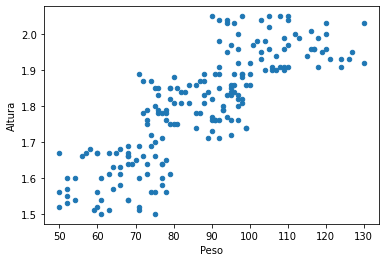

In [485]:
df.plot.scatter(y='Altura',x='Peso')

Agrupacion por genero,tamaño de cada genero

<AxesSubplot:>

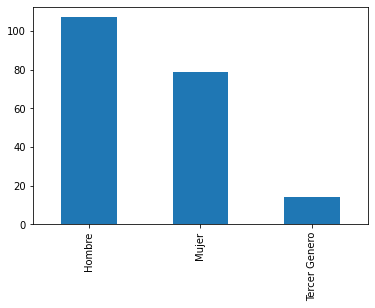

In [486]:
conteoG = df.Genero.value_counts()
conteoG.plot.bar()

Graficamos un conteo de personas por edad

<AxesSubplot:>

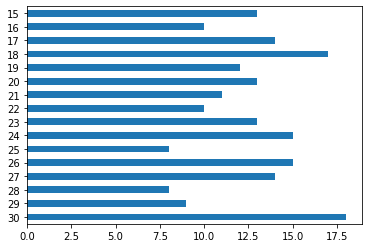

In [487]:
conteoE = df.Edad.value_counts()
conteoE = conteoE.sort_index(ascending=False)
conteoE.plot.barh()

Realizamos una grafica de frecuencia mediante la altura para saber donde esta ubicada la mayor parte de la población.

<AxesSubplot:ylabel='Frequency'>

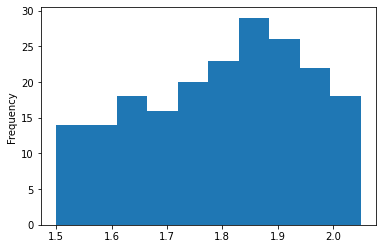

In [488]:
df.Altura.plot.hist()

Mediante un grafico de caja podemos ver mejor donde estan concentrada la población.

<AxesSubplot:>

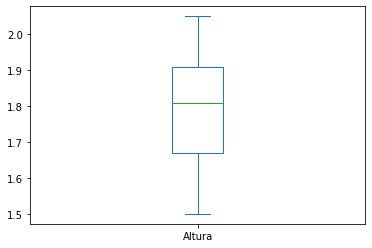

In [489]:
df.Altura.plot.box()

Calculamos el IMC (indice de masa corporal), para todos los datos

In [490]:
df['IMC'] = df['Peso']/(df['Altura']*df['Altura'])
df

,Nombre,Apellido,email,Genero,Altura,Peso,Edad,IMC
0,Steffen,Brisco,sbrisco0@mlb.com,Mujer,1.74,99,29,32.699168
1,Lea,Saye,lsaye1@reference.com,Hombre,1.97,110,16,28.343941
2,Ondrea,Walkington,owalkington2@businesswire.com,Hombre,1.89,71,22,19.876263
3,Tito,McEntagart,tmcentagart3@lycos.com,Hombre,2.03,96,18,23.295882
4,Clerkclaude,Stennard,cstennard4@blogtalkradio.com,Mujer,1.82,90,25,27.170632
...,...,...,...,...,...,...,...,...
195,Rafaela,Atthow,ratthow5f@sphinn.com,Mujer,1.80,93,21,28.703704
196,D'arcy,Corthes,dcorthes5g@sitemeter.com,Hombre,1.67,63,18,22.589551
197,Bella,Marrill,bmarrill5h@home.pl,Mujer,2.05,108,15,25.698989
198,Barty,Vokins,bvokins5i@examiner.com,Hombre,1.80,97,23,29.938272


# Segun el IMC clasificaremos los datos

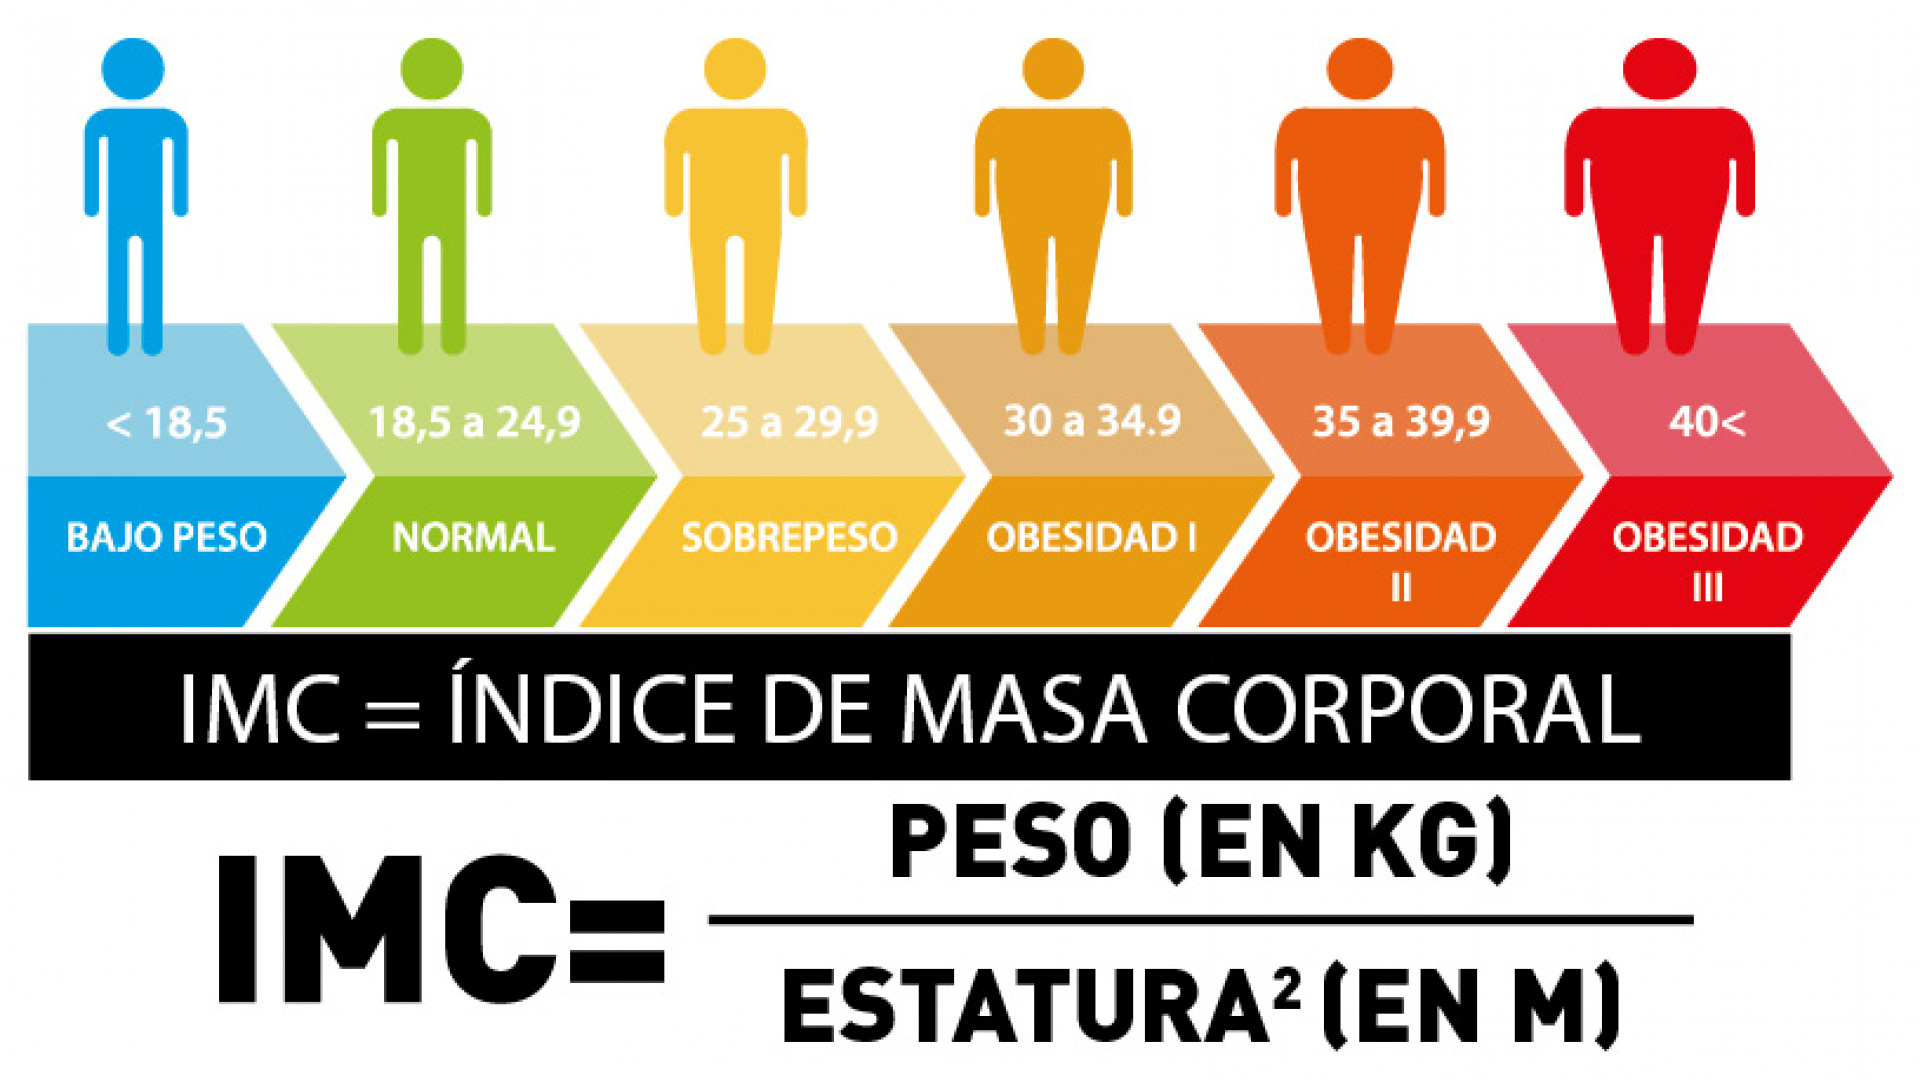

Segun el IMC clasificamos todos los datos en su corresponidente categoria (Bajo peso, Normal, Sobrepeso, Obesidad 1, Obesidad 2, Obesidad 3)

In [491]:
conditionlist = [(df['IMC']<18.5),
                (df['IMC']<24.9),
                (df['IMC']<29.9),
                (df['IMC']<34.9),
                (df['IMC']<39.9),
                (df['IMC']<40)]
choicelist = ['Bajo peso', 'Normal', 'Sobrepeso' , 'Obesidad 1', 'Obesidad 2', 'Obesisad 3']
df['ClassIMC'] = np.select(conditionlist,choicelist,default='NA')
df.sample(20)

,Nombre,Apellido,email,Genero,Altura,Peso,Edad,IMC,ClassIMC
111,Marilyn,McKelvie,mmckelvie33@oakley.com,Hombre,1.66,56,18,20.322253,Normal
1,Lea,Saye,lsaye1@reference.com,Hombre,1.97,110,16,28.343941,Sobrepeso
106,Melina,Molden,mmolden2y@hexun.com,Hombre,1.74,99,29,32.699168,Obesidad 1
70,Tresa,Severwright,tseverwright1y@liveinternet.ru,Hombre,1.78,77,23,24.302487,Normal
45,Errol,Wadelin,ewadelin19@infoseek.co.jp,Mujer,1.98,102,19,26.017753,Sobrepeso
78,Gretchen,Branchflower,gbranchflower26@gravatar.com,Mujer,1.84,95,30,28.060019,Sobrepeso
165,Shalne,Tracey,stracey4l@furl.net,Mujer,1.89,88,19,24.635369,Normal
80,Benjamin,Wellstood,bwellstood28@disqus.com,Tercer Genero,1.84,83,18,24.515595,Normal
160,Omar,Perell,operell4g@dropbox.com,Hombre,1.89,96,17,26.874948,Sobrepeso
60,Stillmann,Woosnam,swoosnam1o@narod.ru,Hombre,1.66,75,28,27.217303,Sobrepeso


## Grafico de la clasifiacion del IMC

Luego de clasificar por categorias hacemos un conteo y nos damos cuenta que la mayoria de la poblacion sin importar el sexo esta en sobrepeso

<AxesSubplot:>

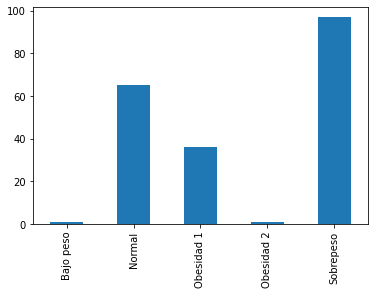

In [492]:
conteoCIMC = df['ClassIMC'].value_counts()
conteoCIMC = conteoCIMC.sort_index(ascending=True)
conteoCIMC.plot.bar()

Despues hacemos un conteo por genero para saber que genero sufre mas de sobrepeso y nos damos cuenta que los hombres son los que mas sufren de sobrepeso en esta muestra

<AxesSubplot:ylabel='Genero,ClassIMC'>

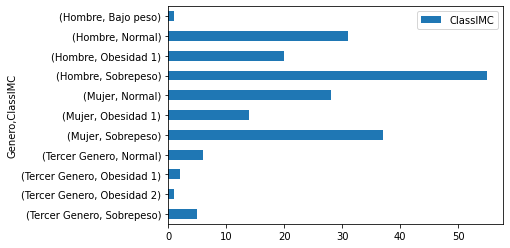

In [493]:
classIMC = df.groupby('Genero')['ClassIMC'].value_counts()
classIMC = classIMC.sort_index(ascending=False)
classIMC.plot(kind= 'barh', legend= 'Reverse')


Realizamos una clasificacion del sobrepeso por edad, y vemos que hay mayor cantidad de muestra con sobrepeso en la edad de 30 años,
 esto coincide en que la mayor parte de la muestra esta en los 30 años, segun la grafica de conteo por edad.

<AxesSubplot:ylabel='Edad'>

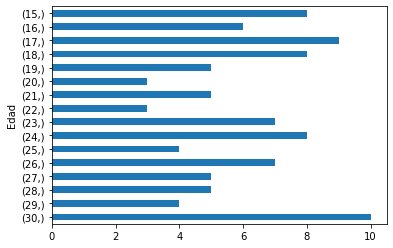

In [494]:
sobrepeso = df.loc[df['ClassIMC'] == 'Sobrepeso', ['Edad']].value_counts()
sobrepeso = sobrepeso.sort_index(ascending=False)
sobrepeso.plot(kind= 'barh', legend= False)


Realizamos un filtro por genero y la categoria de sobrepeso, en los hombres nos damos cuenta que en todas las edades de la muestra hay sobre peso pero en los de 17 años se cuentan mas lo que es un poco extraño ya que estan muy jovenes, se deberia profundizar en la muestra para saber por que ocurre esto.

<AxesSubplot:ylabel='Edad'>

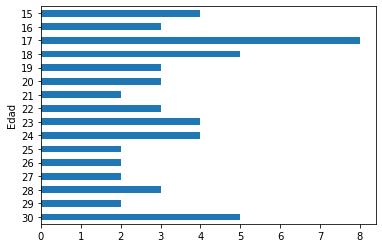

In [495]:
sobrepesoH = df[(df.ClassIMC == 'Sobrepeso') & (df.Genero == 'Hombre')]
sobrepesoH = sobrepesoH.groupby('Edad').size()
sobrepesoH = sobrepesoH.sort_index(ascending=False)
sobrepesoH.plot(kind= 'barh', legend= False)

Ralizamos el mismo filtro por genero y categoria con las mujeres, nos damos cuenta que en casi todas las edades se encuentra sobrepeso, pero en las que mas se repite es en los 26 y 30, a diferencia del hombre esto puede ser mas comun por la disminucion del metavolismo o embarazo.

<AxesSubplot:ylabel='Edad'>

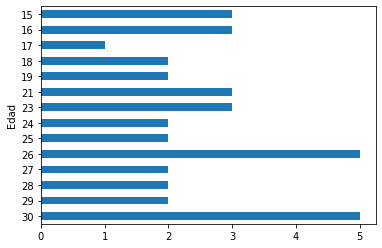

In [496]:
sobrepesoM = df[(df.ClassIMC == 'Sobrepeso') & (df.Genero == 'Mujer')]
sobrepesoM = sobrepesoM.groupby('Edad').size()
sobrepesoM = sobrepesoM.sort_index(ascending=False)
sobrepesoM.plot(kind= 'barh', legend= False)

Para la parte del tercer genero se hizo la misma clasificacion, pero al tener pocos datos no se puede hacer una conclusion precisa

<AxesSubplot:ylabel='Edad'>

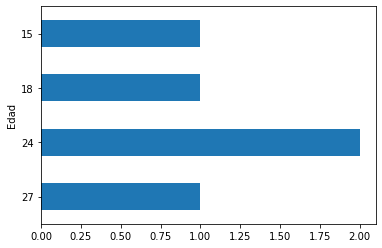

In [497]:
sobrepesoT = df[(df.ClassIMC == 'Sobrepeso') & (df.Genero == 'Tercer Genero')]
sobrepesoT = sobrepesoT.groupby('Edad').size()
sobrepesoT = sobrepesoT.sort_index(ascending=False)
sobrepesoT.plot(kind= 'barh', legend= False)

# Conclusiones

* Podriamos determinar que la muestra sufre de un problema de sobrepeso en general.
* Es extraño ver que los hombres de 17 años esten con un sobrepeso y esto deberia revisarse mas a detalle.
* Los hombres mayormente estan sufriendo de sobre peso.